# 1. Sentimentos com Spacy

In [29]:
import spacy
import pt_core_news_sm
import pandas as pd
import string
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Pré Processamento

In [2]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS
stop_words.add('o')

In [3]:
#pln = spacy.load("pt_core_news_sm")
pln = spacy.load('pt_core_news_sm')


In [4]:
def preprocessamento(texto):
    texto = texto.lower()
    documento = pln(texto)
    
    lista = []
    for token in documento:
        lista.append(token.lemma_)
        
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation ]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    
    return lista

# Carregar o modelo

In [5]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

# Avaliação na base de testes

In [6]:
df_DoisIrmaos = pd.read_excel('./data/DoisIrmaos_Revisado.xlsx',
                 error_bad_lines=False,
                  usecols = ['ID', 'Personagem','Texto', 'Tipo', 'TamanhoFrase'])

df_DoisIrmaos.shape

(4790, 5)

In [7]:
df_DoisIrmaos.head()

,ID,Personagem,Texto,Tipo,TamanhoFrase
0,1,Narrador,Zana teve de deixar tudo: o bairro portuário d...,Narração,406
1,2,Narrador,"Perto do alpendre, o cheiro das açucenas-branc...",Narração,84
2,3,Narrador,"Então ela sentava no chão, rezava sozinha e ch...",Narração,79
3,4,Narrador,"Antes de abandonar a casa, Zana via o vulto do...",Narração,163
4,5,Narrador,Durante o dia eu a ouvia repetir as palavras d...,Narração,59


In [8]:
df_DoisIrmaos.isnull().sum()

ID              0
Personagem      0
Texto           0
Tipo            0
TamanhoFrase    0
dtype: int64

In [9]:
df_DoisIrmaos['Texto_novo'] = df_DoisIrmaos['Texto'].apply(preprocessamento)

In [10]:
df_DoisIrmaos.head()

,ID,Personagem,Texto,Tipo,TamanhoFrase,Texto_novo
0,1,Narrador,Zana teve de deixar tudo: o bairro portuário d...,Narração,406,zana deixar bairro portuário manaus ruir decli...
1,2,Narrador,"Perto do alpendre, o cheiro das açucenas-branc...",Narração,84,alpendrar cheirar açucenas-brancas misturar fi...
2,3,Narrador,"Então ela sentava no chão, rezava sozinha e ch...",Narração,79,sentar chão rezar e chorar desejar voltar omar
3,4,Narrador,"Antes de abandonar a casa, Zana via o vulto do...",Narração,163,antar abandonar casar zana vulto pai e esposar...
4,5,Narrador,Durante o dia eu a ouvia repetir as palavras d...,Narração,59,durante dia ouvir repetir palavra pesadelo


In [11]:
previsoes = []
for texto in df_DoisIrmaos['Texto_novo']:    
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [12]:
previsoes_final = []
for previsao in previsoes:
    if previsao['ALEGRIA']>previsao['MEDO'] and previsao['ALEGRIA']>previsao['RAIVA'] and previsao['ALEGRIA']>previsao['TRISTEZA']:
        previsoes_final.append('alegria')
    elif previsao['TRISTEZA']>previsao['MEDO'] and previsao['TRISTEZA']>previsao['RAIVA'] and previsao['TRISTEZA']>previsao['ALEGRIA']:
        previsoes_final.append('tristeza')
    elif previsao['MEDO']>previsao['TRISTEZA'] and previsao['MEDO']>previsao['RAIVA'] and previsao['MEDO']>previsao['ALEGRIA']:
        previsoes_final.append('medo')
    elif previsao['RAIVA']>previsao['TRISTEZA']  and previsao['RAIVA']>previsao['ALEGRIA']  and previsao['RAIVA']>previsao['MEDO']:
        previsoes_final.append('raiva')
    else:
        previsoes_final.append('sem rótulo')

previsoes_final = np.array(previsoes_final)

In [13]:
df_DoisIrmaos['Emoção'] = previsoes_final

Text(0.5, 1.0, 'Falas de Omar - Dois Irmãos')

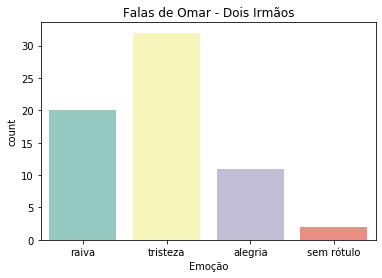

In [30]:
df_omar = df_DoisIrmaos[df_DoisIrmaos.Personagem=='Omar']
categorias= ["raiva", "tristeza","alegria", "sem rótulo"]
sns.countplot(df_omar['Emoção'], label = 'Contagem', palette="Set3", order = categorias)
plt.title("Falas de Omar - Dois Irmãos")

Text(0.5, 1.0, 'Falas de Yaqub - Dois Irmãos')

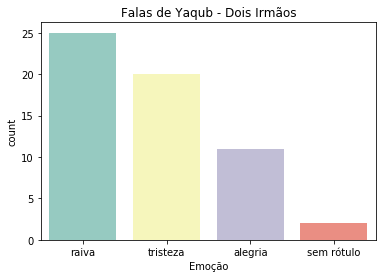

In [31]:
df_Yaqub = df_DoisIrmaos[df_DoisIrmaos.Personagem=='Yaqub']
categorias= ["raiva", "tristeza","alegria", "sem rótulo"]
sns.countplot(df_Yaqub['Emoção'], label = 'Contagem', palette="Set3" , order = categorias)
plt.title("Falas de Yaqub - Dois Irmãos")

Text(0.5, 1.0, 'Falas de Zana - Dois Irmãos')

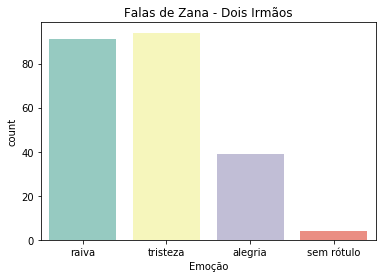

In [32]:
df_Zana = df_DoisIrmaos[df_DoisIrmaos.Personagem=='Zana']
categorias= ["raiva", "tristeza","alegria", "sem rótulo"]
sns.countplot(df_Zana['Emoção'], label = 'Contagem', palette="Set3" , order = categorias)
plt.title("Falas de Zana - Dois Irmãos")

Text(0.5, 1.0, 'Falas de Zana - Dois Irmãos')

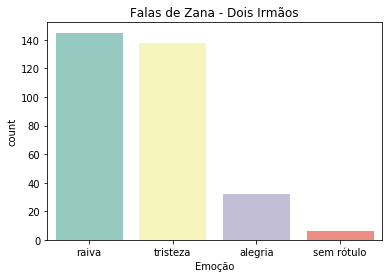

In [33]:
df_Halim = df_DoisIrmaos[df_DoisIrmaos.Personagem=='Halim']
categorias= ["raiva", "tristeza","alegria", "sem rótulo"]
sns.countplot(df_Halim['Emoção'], label = 'Contagem', palette="Set3" , order = categorias)
plt.title("Falas de Zana - Dois Irmãos")